# AST326 lab01
### Maxwell Fine 1004714400

## Q1A: 

Rearrange the gravitational force law predicted by general relativity (aproximated) into one that can be numerically intergrated

$\vec{F}_{g} \approx \frac{-GM_{\odot}M_{p}}{r^{3}} \left( 1 + \frac{\alpha}{r^{2}} \right)
\left( x\hat{x} + y\hat{y} \right)$ 


### Answer:

$\frac{dv_{x}}{dt} = \frac{-GM_{\odot}M_{p}}{r^{3}} \left( 1 + \frac{\alpha}{r^{2}} \right)x$

$\frac{dv_{y}}{dt} = \frac{-GM_{\odot}M_{p}}{r^{3}} \left( 1 + \frac{\alpha}{r^{2}} \right)y$

$\frac{dx}{dt} = v_{x}$

$\frac{dy}{dt} = v_{y}$



## Q1B:

Write a “pseudocode” for
a program that integrates your equations to calculate the position and velocity of the planet as a function of time under the
Newtonian gravity force. The output of your code should include
graphs of the components of velocity as a function of time and a
plot of the orbit (x vs. y) in space.

### define constants
* define any universal constants of the cosmos, and which are needed


### force gravity function
* a function that takes in the x, y position and returns the x and y componet for force

### intergrator function:
* a function to numerically integrate the equations 
* inputs inital condictions and timestep

* outputs arrays of $x$, $y$, $v_x$ and $v_y$


### orbit plotting function
* a plotting function for orbits
* takes in sets of positon and velocties for planets, and associated labels
* uses matplotlib.pyplot to plot the orbit, set color and label
* produce a 'plt.plot' style figure
* set fontsize, and adjust colors
* save figure as a pdf

### velocity componet function
* plotting function for velocity componets of orbits in terms of $\hat{x}$, $\hat{y}$
* takes in sets of positon and velocties for planets, and associated labels
* produce a vector field style plot
* set fontsize, and adjust colors
* save figure as a pdf

### wrapper function
* function that uses the intergrator, and the 2 plotting functions to both solve and plot
* takes in sets of inital conditions corresponding to the sun, planets and any \*\*kargs for plotting
* run a loop over n planets
* for the nth planet produce the numerical solutions
* collect numerical solutions and feed into plotting functions
* outputs graphs of the components of velocity as a function of time and a plot of the orbit (x vs. y) in space


## Q1C:

Now write a real python code from your pseudocode. We will
assume the planet is Mercury.

Initial Conditions:

$x = 0.47$ AU,   

$v_x = 0.0$ AU/yr,  

$y = 0.0$ AU,  

$v_y = 8.17$ AU/yr,  

Timestep: 
$\Delta T = 0.0001$ yr,  

integrate for 1 year
Check if angular momentum is conserved from the beginning to the end
of the orbit. You should see an elliptical orbit.


### Euler-Cromer Method


 Position is:  
 $x_{i+1} = x_i + v_{x,i+1} \Delta t$,  

 $y_{i+1} = x_i + v_{y,i+1} \Delta t$,
 
 Velocity is:
 
 $v_{x,i+1} = x_i + F_g(x) \Delta t$,
 
 $v_{y,i+1} = x_i + F_g(y) \Delta t$,

In [94]:
# imports
import numpy as np
import matplotlib.pyplot as plt
G_AU = 39.5 # for AU, solar mass and year system
m_sun = 2.0*1e30 #kg
G = 6.67*1e-11 # SI units
AU = 1.496*1e11 #m
m__merc = 3.285*10**23 # kg
year = 365*24*60*60 # seconds in a year

def gr_2b_g_acc(x, y, m_p, G=39.5, alpha=0, m_sun=1):
    '''Calculates the x, and y componets of GR corrected 
    Newtonion gravitional accerlation around the sun
    
    Args:
    x: float, in m
       positioin in the x direction
       
    y: float, in m
       position in the y direction
       
    m_p: float, in kg
         mass of planet / orbiting body
       
    **Kargs
    G: float, 
       G constant to use, defAUlt is SI units
    
    alpha: float, in AU^2
           value of alpha to use in correction for GR, defAUlt is 0
    
    M_sun: float
           Mass of the sun / central body
           
    Returns:
    ax, ay: 2 floats
            x, and y componets of the accerlation
    
    '''
    
    # Calculate magnitude of r
    r = np.sqrt(x**2 + y**2)

    # Calculate force componets
    ax = -1*((G*m_sun) / (r**3)) * ( 1 + (alpha/r**2)) * (x)
    ay = -1*((G*m_sun) / (r**3)) * ( 1 + (alpha/r**2)) * (y)
 
    return ax, ay


def fg_solver(xi, yi, vxi, vyi, dt=0.0001, int_time=1., alpha=0):
    '''Numerically solves the 2 body problem
     using the GR correction for Newtonion gravity.
     Uses the The “Euler-Cromer” method.
     
     Args:
     xi: float, in AU
         inital positon in the x direction
         
     yi: float, in AU
         inital positon in the y direction
    
     vxi: float, in AU/year
          x componet of the inital velocilty
    
     vyi: float, in AU/year
          y componet of the inital velocity


    **Args:
    dt: float, in years
              dt to use for numerical solution, defAUlt is 0.0001
              
    int_time: float, in Earth years
              integration time for solution, IE how long to solve for
              
    alpha: float, in AU^2
           value of alpha to use in correction for GR, defAUlt is 0
    
    
    Returns:
    x_arr, y_arr, vx_arr, vy_arr
    
    i_arr: array-like, float
           array of the ith direction 
           
    vi_arr: array-like, float
            array of the ith direction's velocity
           
    '''
    
    # initalize values
    n_steps = int(int_time/dt) # how many dts between 0 and end
    x_arr = np.empty((n_steps),dtype=float)
    y_arr = np.empty((n_steps),dtype=float)
    vx_arr = np.empty((n_steps),dtype=float)
    vy_arr = np.empty((n_steps),dtype=float)
    ax_arr = np.empty((n_steps),dtype=float)
    ay_arr = np.empty((n_steps),dtype=float)
    
    # apply inital conditions
    dt = dt
    x_arr[0] = xi # AU
    y_arr[0] = yi # AU
    vx_arr[0] = vxi # AU/ Year
    vy_arr[0] = vyi # AU/ Year
    
    # numeric integration
    for i in range(1, n_steps):
        
        # Calculate acceleration
        ax_arr[i], ay_arr[i] = gr_2b_g_acc(x_arr[i-1], y_arr[i-1],
                        m_p, alpha=alpha,)
        # Calculate velocity
        vx_arr[i] = vx_arr[i-1] + dt*ax_arr[i]
        vy_arr[i] = vy_arr[i-1] + dt*ay_arr[i]
        # Calculate position
        x_arr[i] = x_arr[i-1] + dt*vx_arr[i]
        y_arr[i] = y_arr[i-1] + dt*vy_arr[i]
            
    return x_arr, y_arr, vx_arr, vy_arr


def plot_orbits(x_arrs, y_arrs, labels, colors, 
                color_int, line_styles, title,
                int_time, dt, plot_sun=True):
    
    # initalize figure
    plt.figure(figsize=(8, 8), dpi=80)
    
    # plot sun
    if plot_sun == True:
        plt.scatter(0,0,marker ='o',color ='gold',label = 'Sol')
    
    # plot planets
    for i in range(len(x_arrs)):
        # get info for the ith planet
        x_arr = x_arrs[i]
        y_arr = y_arrs[i]
        label = labels[i]
        color = colors[i]
        color_int_i = color_int[i]
        linestyle = line_styles[i]
        
        # plot orbits
        plt.plot(x_arr, y_arr, color=color, label=label, linestyle=linestyle)
        
    
    plt.scatter(x_arr[0], y_arr[0], color=color_int_i, label="Starting Positon")
    plt.xlabel("x (AU)", fontsize=label_fs)
    plt.ylabel("y (AU)",fontsize=label_fs)
    plt.axis('square')
    plt.xticks(fontsize=label_fs)
    plt.yticks(fontsize=label_fs)
    
    
    plt.legend(title='Initgration time of ' + str(int_time)[0:3] + ' (yr)' 
               +' \n$\Delta$t = ' + str(dt) + ' (yr)',
               fontsize=legend_fs, bbox_to_anchor=(1, 1), title_fontsize=legend_fs)
    plt.title(title, fontsize=label_fs)
    return
        
def angular_momentum(x, y, vx, vy, m_p, m_sun = 2.0*1e30):
    '''Calculates the angular momentum for a given planet
       around the sun. Uses L = |v|m_p*r, returned value is in SI.
       
       Args:
       x: float, in AU
          postion of the planet, along the x direction
          
       y: float, in AU
          postion of the planet, along the y direction
          
       vx: float, in au/year
           the x velocity componet 
           
       vy: float, in au/year
           the x velocity componet
       
       m_p: float, in kg
            mass of the planet
       
       **Kargs:
       m_sun: float, in kg
              mass of the sun, default is m_sun = 2.0*1e30
              
       returns:
       L: float
          angular momentum in SI units
       '''
    # Convert to si units
    x *= Au
    y *= AU
    vx = vx * AU/year
    vy = vy * AU/year
        
    # calculate r, and v vectors
    r = np.sqrt (x**2 + y**2)
    v = np.sqrt(vx**2 + vy**2)
        
    # Calculate L
    L = v*m_p*r # this assumes v, r are orthogonal
    
    return L
        
    
def velcoity_plot(vx_arrs, vy_arrs, int_time, timestep, labels, fs,):
    # plots velocity componets 
    
    # initalize figure
   #  plt.figure(figsize=(8, 8), dpi=80)
    
    # make time array
    time = np.linspace(0, int_time, int(int_time/timestep))
    
    for i in range(len(vx_arrs)):
        plt.plot(time, vx_arrs[i], linestyle='--', color = 'green', label='$v_{x}$')
        plt.plot(time, vy_arrs[i], color= 'k', label='$v_{y}$')
        
    # adjust plot parameters and add labels
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel('Time (yr)', fontsize = fs)
    plt.ylabel('Velocity (AU/yr)', fontsize = fs)
    plt.legend(fontsize=legend_fs, bbox_to_anchor=(1, 1))
    
    plt.title(title, fontsize=fs)
    

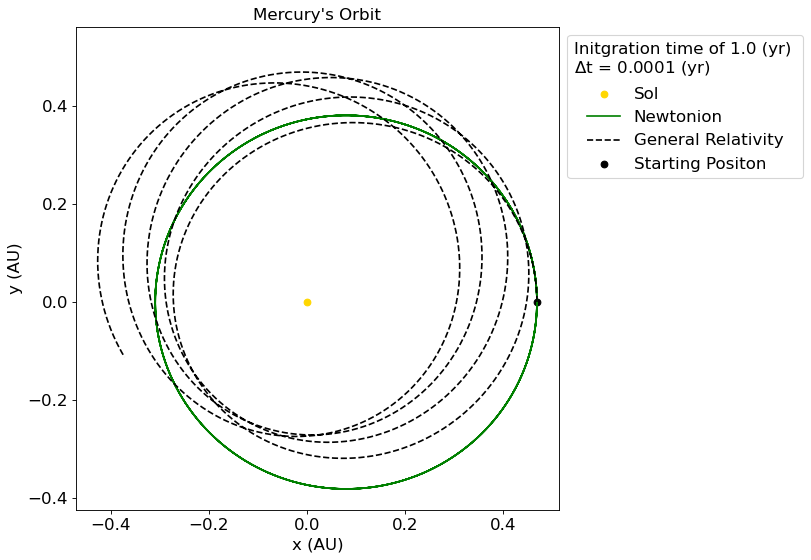

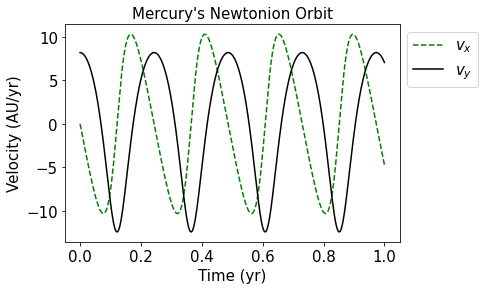

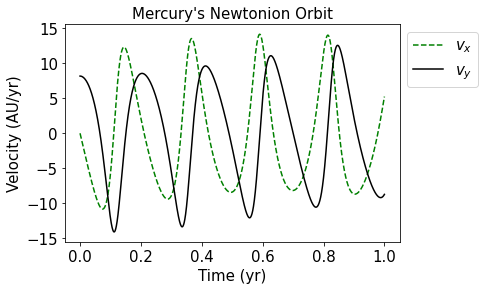

In [98]:

# if name == main
dynamic_vars_class = fg_solver(xi=0.47, yi=0, vxi=0,
                               vyi=8.17, dt=0.0001, int_time=1., alpha=0)

x_arr_class, y_arr_class, vx_arr_class, vy_arr_class = dynamic_vars_class

dynamic_vars_gr = fg_solver(xi=0.47, yi=0, vxi=0, vyi=8.17,dt= 0.0001,
                         int_time=1.,alpha= 0.01)

x_arr_gr, y_arr_gr, vx_arr_gr, vy_arr_gr = dynamic_vars_gr

x_arrs = [x_arr_class, x_arr_gr]
y_arrs = [y_arr_class, y_arr_gr]
labels = ['Newtonion', 'General Relativity']
colors = ['green', 'k'] 
color_int = ['k', 'k']
title= 'Mercury\'s Orbit'
int_time = 1.
line_styles = ['-', '--']
dt = 0.0001
label_fs = 15
legend_fs = 15
plot_orbits(x_arrs, y_arrs, labels, colors, 
                color_int, line_styles, title, int_time, dt, plot_sun=True)
plt.savefig('q1_orbit.pdf')
plt.figure()

title = 'Mercury\'s Newtonion Orbit'
velcoity_plot([vx_arr_class], [vy_arr_class], int_time=1,
              timestep=0.0001, labels=['test'], fs=15,)
plt.savefig('q1_vel_newton.pdf')

plt.figure()
title= 'Mercury\'s Newtonion Orbit'
velcoity_plot([vx_arr_gr], [vy_arr_gr], int_time=1,
              timestep=0.0001, labels=['test'], fs=15,)
plt.savefig('q1_vel_gr.pdf')

#l1 = angular_momentum(x, y, vx, vy, m_sun = 2.0*1e30)

In [85]:
def velcoity_plot(vx_arrs, vy_arrs, int_time, timestep, labels, fs,):
    # plots velocity componets 
    
    # initalize figure
   #  plt.figure(figsize=(8, 8), dpi=80)
    
    # make time array
    time = np.linspace(0, int_time, int(int_time/timestep))
    
    for i in range(len(vx_arrs)):
        plt.plot(time, vx_arrs[i], linestyle='--', color = 'green', label='$v_{x}$')
        plt.plot(time, vy_arrs[i], color= 'k', label='$v_{y}$')
        
    # adjust plot parameters and add labels
    plt.xticks(fontsize=fs)
    plt.yticks(fontsize=fs)
    plt.xlabel('Time (yr)', fontsize = fs)
    plt.ylabel('Velocity (AU/yr)', fontsize = fs)
    plt.legend(fontsize=legend_fs, bbox_to_anchor=(1, 1))
    
    plt.title(title, fontsize=fs)
    

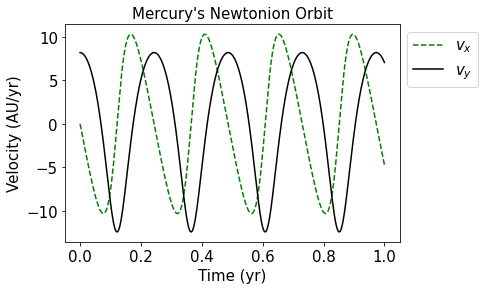

In [95]:
title = 'Mercury\'s Newtonion Orbit'
velcoity_plot([vx_arr_class], [vy_arr_class], int_time=1,
              timestep=0.0001, labels=['test'], fs=15,)

In [ ]:
# plot orbital angular momentum
# L = |v|rsin(angle)


In [ ]:
title = 'Mercury\'s Newtonion Orbit'
velcoity_plot([vx_arr_class], [vy_arr_class], int_time=1,
              timestep=0.0001, labels=['test'], fs=15,)

In [ ]:
title = 'Mercury\'s GR Orbit'
velcoity_plot([vx_arr_gr], [vy_arr_gr], int_time=1,
              timestep=0.0001, labels=['test'], fs=15,)

In [ ]:
# plot orbital angular momentum? just need to calculate
# L = |v|rsin(angle) #theta not always 90*!

